#**AI VIET NAM**
#**RNN**

#**RNN**

In [1]:
import torch
import torch.nn as nn

torch.manual_seed(42)
torch.__version__

'2.1.0+cpu'

In [4]:
batch_size = 1
seq_length = 3
embedding_dim = 3

input = torch.randint(
    high=2,
    size=(batch_size, seq_length, embedding_dim),
    dtype=torch.float32
)

input, (input.shape) # size = 3D, (batch_size * seq_length * embedding_dim)

(tensor([[[1., 0., 1.],
          [0., 1., 1.],
          [1., 1., 1.]]]),
 torch.Size([1, 3, 3]))

In [6]:
embedding_dim = 3
hidden_size = 2
activation = 'relu'

rnn_layer = nn.RNN(
    input_size=embedding_dim,
    hidden_size=hidden_size,
    nonlinearity=activation,
    batch_first=True
)

# text -> tokenize -> vetorize -> embedding -> RNN
"""
RNN layer: 
    - input_size: Size of embedding dimension
    - hidden_size: Number of elements (neurons) != layers
    - nonlinearity: Determine the actication function
    - batch_size: This indicates whether the input and output tensors should have the batch size as the first dimension or not
"""
print()

In [39]:
# help(nn.RNN)

In [8]:
rnn_layer.all_weights

[[Parameter containing:
  tensor([[-0.1918,  0.2976,  0.6313],
          [ 0.4087, -0.3091,  0.4082]], requires_grad=True),
  Parameter containing:
  tensor([[ 0.1265,  0.3591],
          [-0.4310, -0.7000]], requires_grad=True),
  Parameter containing:
  tensor([-0.2732, -0.5424], requires_grad=True),
  Parameter containing:
  tensor([0.5802, 0.2037], requires_grad=True)]]

In [27]:
"""
Initalize parameters
"""

for param in rnn_layer.parameters():
    init_kernel_weight = torch.randint(
        high=2,
        size=(param.data.shape),
        dtype=torch.float32
    )
    param.data = init_kernel_weight

In [28]:
rnn_layer.all_weights

[[Parameter containing:
  tensor([[1., 0., 1.],
          [0., 1., 1.]], requires_grad=True),
  Parameter containing:
  tensor([[1., 0.],
          [1., 0.]], requires_grad=True),
  Parameter containing:
  tensor([1., 0.], requires_grad=True),
  Parameter containing:
  tensor([1., 0.], requires_grad=True)]]

**Example 1**

In [17]:
output, hn = rnn_layer(input)

In [18]:
output

tensor([[[2., 2.],
         [2., 2.],
         [3., 2.]]], grad_fn=<TransposeBackward1>)

In [19]:
hn

tensor([[[3., 2.]]], grad_fn=<StackBackward0>)

**Example 2**

In [20]:
h0 = torch.randint(
    high=2,
    size=(1, batch_size, hidden_size),
    dtype=torch.float32
)

In [21]:
h0

tensor([[[1., 1.]]])

In [22]:
output, hn = rnn_layer(input, h0)

In [23]:
output

tensor([[[2., 2.],
         [2., 2.],
         [3., 2.]]], grad_fn=<TransposeBackward1>)

In [24]:
hn

tensor([[[3., 2.]]], grad_fn=<StackBackward0>)

**Example 3**

In [25]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

data = ["dog bites man", "man bites dog", "dog eats meat", "man eats food"]

# Define the max vocabulary size
vocab_size = 7

# Define tokenizer function
tokenizer = get_tokenizer('basic_english')

# Create a function to yield list of tokens
def yield_tokens(examples):
    for text in examples:
        yield tokenizer(text)

# Create vocabulary
vocab = build_vocab_from_iterator(
    yield_tokens(data),
    max_tokens=vocab_size,
    specials=["<unk>"]
)
vocab.set_default_index(vocab["<unk>"])

vocab.get_stoi()

{'food': 5, 'dog': 1, '<unk>': 0, 'man': 2, 'bites': 3, 'meat': 6, 'eats': 4}

In [26]:
input = torch.tensor(vocab(tokenizer("dog bites man")))
input

tensor([1, 3, 2])

In [29]:
input = input.unsqueeze(0)

In [30]:
from torch import nn

embedding = nn.Embedding(
    num_embeddings=vocab_size,
    embedding_dim=10
)

In [31]:
embedding.weight

Parameter containing:
tensor([[ 5.2462e-01,  1.1412e+00,  5.1644e-02,  7.2811e-01, -7.1064e-01,
         -6.0207e-01,  9.6045e-01,  4.0481e-01, -8.2777e-01,  1.3347e+00],
        [ 4.8354e-01, -1.9756e-01,  1.2683e+00,  1.2243e+00,  9.8117e-02,
          1.7423e+00,  5.8325e-01,  1.0669e+00, -4.5015e-01, -6.7875e-01],
        [ 5.7432e-01,  1.8775e-01, -3.5762e-01, -3.1651e-01,  1.2732e+00,
         -1.3109e-03, -3.0360e-01, -9.8644e-01,  1.2330e-01,  3.4987e-01],
        [ 6.1728e-01, -1.6933e-01,  9.1152e-02, -3.8907e-01,  5.2792e-01,
          1.0311e+00, -7.0477e-01,  1.0131e+00, -3.3082e-01,  5.1769e-01],
        [ 3.3989e-01,  7.1997e-01,  4.1141e-01, -5.7332e-01,  5.0686e-01,
         -4.7521e-01, -4.9203e-01,  2.7037e-01,  1.6354e+00,  6.5474e-01],
        [ 5.7600e-01, -3.6091e-01, -6.0590e-02,  7.3255e-02,  4.9756e-01,
         -4.2572e-01, -1.3371e+00, -1.9334e-01,  6.5264e-01, -1.9006e+00],
        [ 2.2858e-01,  2.4859e-02,  1.9473e-01, -1.6535e+00,  6.8142e-01,
          

In [32]:
embedded = embedding(input)

In [33]:
embedding_dim = 10
hidden_size = 5
activation = 'relu'

rnn_layer = nn.RNN(
    input_size=embedding_dim,
    hidden_size=hidden_size,
    nonlinearity=activation,
    batch_first=True
)

In [34]:
output, hn = rnn_layer(embedded)

#**Text Classification using RNN**

###**Load Dataset**

In [42]:
!git clone https://github.com/congnghia0609/ntc-scv.git

Cloning into 'ntc-scv'...


In [43]:
!unzip ./ntc-scv/data/data_test.zip -d ./data
!unzip ./ntc-scv/data/data_train.zip -d ./data
!rm -rf ./ntc-scv

'unzip' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
!tar -xf ./ntc-scv/data/data_test.zip -C ./data
!tar -xf ./ntc-scv/data/data_train.zip -C ./data

tar: Error opening archive: Failed to open './ntc-scv/data/data_test.zip'
tar: Error opening archive: Failed to open './ntc-scv/data/data_train.zip'


In [ ]:
import os
import pandas as pd

def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding="utf-8") as f:
                lines = f.readlines()
            sentence = " ".join(lines)
            if label == "neg":
                label = 0
            if label == "pos":
                label = 1
            data = {
                'sentence': sentence,
                'label': label
            }
            examples.append(data)
    return pd.DataFrame(examples)

In [ ]:
folder_paths = {
    'train': './data/data_train/train',
    'valid': './data/data_train/test',
    'test': './data/data_test/test'
}

train_df = load_data_from_path(folder_paths['train'])
valid_df = load_data_from_path(folder_paths['valid'])
test_df = load_data_from_path(folder_paths['test'])

###**Preprocessing**

**Language Detection**

In [ ]:
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=5d7e77ed1b2d29207cfbdb8d05ad1f6027755490f866b150bfe0b0b69463bab0
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
from langid.langid import LanguageIdentifier, model

def identify_vn(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    not_vi_idx = set()
    THRESHOLD = 0.9
    for idx, row in df.iterrows():
        score = identifier.classify(row["sentence"])
        if score[0] != "vi" or (score[0] == "vi" and score[1] <= THRESHOLD):
            not_vi_idx.add(idx)
    vi_df = df[~df.index.isin(not_vi_idx)]
    not_vi_df = df[df.index.isin(not_vi_idx)]
    return vi_df, not_vi_df

In [ ]:
train_df_vi, train_df_other = identify_vn(train_df)

**Text Cleaning**

In [ ]:
import re
import string

def preprocess_text(text):
    # remove URLs https://www.
    url_pattern = re.compile(r'https?://\s+\wwww\.\s+')
    text = url_pattern.sub(r" ", text)

    # remove HTML Tags: <>
    html_pattern = re.compile(r'<[^<>]+>')
    text = html_pattern.sub(" ", text)

    # remove puncs and digits
    replace_chars = list(string.punctuation + string.digits)
    for char in replace_chars:
        text = text.replace(char, " ")

    # remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r" ", text)

    # normalize whitespace
    text = " ".join(text.split())

    # lowercasing
    text = text.lower()
    return text

In [ ]:
train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]
valid_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in valid_df.iterrows()]
test_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in test_df.iterrows()]

###**Representation**

In [ ]:
def yield_tokens(sentences, tokenizer):
    for sentence in sentences:
        yield tokenizer(sentence)

In [ ]:
# word-based tokenizer
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer("basic_english")

In [ ]:
# build vocabulary
from torchtext.vocab import build_vocab_from_iterator

vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(train_df_vi['preprocess_sentence'], tokenizer),
    max_tokens=vocab_size,
    specials=["<pad>", "<unk>"]
)
vocabulary.set_default_index(vocabulary["<unk>"])

In [ ]:
from torchtext.data.functional import to_map_style_dataset

def prepare_dataset(df):
    # create iterator for dataset: (sentence, label)
    for index, row in df.iterrows():
        sentence = row['preprocess_sentence']
        encoded_sentence = vocabulary(tokenizer(sentence))
        label = row['label']
        yield encoded_sentence, label

train_dataset = prepare_dataset(train_df_vi)
train_dataset = to_map_style_dataset(train_dataset)

valid_dataset = prepare_dataset(valid_df)
valid_dataset = to_map_style_dataset(valid_dataset)

test_dataset = prepare_dataset(test_df)
test_dataset = to_map_style_dataset(test_dataset)

###**Dataloader**

In [ ]:
import torch

seq_length = 50

def collate_batch(batch):
    # create inputs, offsets, labels for batch
    sentences, labels = list(zip(*batch))
    encoded_sentences = [
        sentence+([0]* (seq_length-len(sentence))) if len(sentence) < seq_length else sentence[:seq_length]
        for sentence in sentences
    ]

    encoded_sentences = torch.tensor(encoded_sentences, dtype=torch.int64)
    labels = torch.tensor(labels)

    return encoded_sentences, labels

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_batch
)
valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch
)

In [ ]:
next(iter(train_dataloader))

(tensor([[   7,  142, 1175,  ...,    2,   10,   26],
         [   3,   43,    5,  ...,    9,  119,    3],
         [   7,  421,  586,  ...,    0,    0,    0],
         ...,
         [ 165,   44,   11,  ...,    0,    0,    0],
         [   6,   60,  302,  ...,   40,  721,   46],
         [  23,    2,   30,  ...,  403,    3,  119]]),
 tensor([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
         1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
         0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
         0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
         0, 1, 1, 0, 0, 1, 0, 1]))

In [ ]:
len(train_dataloader)

233

In [ ]:
encoded_sentences, labels = next(iter(train_dataloader))

In [ ]:
encoded_sentences.shape

torch.Size([128, 50])

In [ ]:
labels.shape

torch.Size([128])

###**Trainer**

In [ ]:
import time

def train_epoch(model, optimizer, criterion, train_dataloader, device, epoch=0, log_interval=50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()

    for idx, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        predictions = model(inputs, device)

        # compute loss
        loss = criterion(predictions, labels)
        losses.append(loss.item())

        # backward
        loss.backward()
        optimizer.step()
        total_acc += (predictions.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(train_dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [ ]:
def evaluate_epoch(model, criterion, valid_dataloader, device):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []

    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(valid_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            predictions = model(inputs, device)

            loss = criterion(predictions, labels)
            losses.append(loss.item())

            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [ ]:
def train(model, model_name, save_model, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device):
    train_accs, train_losses = [], []
    eval_accs, eval_losses = [], []
    best_loss_eval = 100
    times = []
    for epoch in range(1, num_epochs+1):
        epoch_start_time = time.time()
        # Training
        train_acc, train_loss = train_epoch(model, optimizer, criterion, train_dataloader, device, epoch)
        train_accs.append(train_acc)
        train_losses.append(train_loss)

        # Evaluation
        eval_acc, eval_loss = evaluate_epoch(model, criterion, valid_dataloader, device)
        eval_accs.append(eval_acc)
        eval_losses.append(eval_loss)

        # Save best model
        if eval_loss < best_loss_eval:
            torch.save(model.state_dict(), save_model + f'/{model_name}.pt')

        times.append(time.time() - epoch_start_time)
        # Print loss, acc end epoch
        print("-" * 59)
        print(
            "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
            "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
                epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
            )
        )
        print("-" * 59)

    # Load best model
    model.load_state_dict(torch.load(save_model + f'/{model_name}.pt', weights_only=True))
    model.eval()
    metrics = {
        'train_accuracy': train_accs,
        'train_loss': train_losses,
        'valid_accuracy': eval_accs,
        'valid_loss': eval_losses,
        'time': times
    }
    return model, metrics

In [ ]:
import matplotlib.pyplot as plt

def plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses):
    epochs = list(range(num_epochs))
    fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
    axs[0].plot(epochs, train_accs, label = "Training")
    axs[0].plot(epochs, eval_accs, label = "Evaluation")
    axs[1].plot(epochs, train_losses, label = "Training")
    axs[1].plot(epochs, eval_losses, label = "Evaluation")
    axs[0].set_xlabel("Epochs")
    axs[1].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_ylabel("Loss")
    plt.legend()

#**RNN**

###**Modeling**

In [ ]:
from torch import nn
from torch.nn import functional as F

class RNNClassifier(nn.Module):
    def __init__(
            self, vocab_size=10000, embedding_dim=200,
            hidden_size=150, num_classes=2
        ):
        super(RNNClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.embedding_dim = embedding_dim
        self.embedding_layer = nn.Embedding(
            num_embeddings=vocab_size,
            embedding_dim=embedding_dim
        )
        self.rnn = nn.RNN(
            input_size=self.embedding_dim,
            hidden_size=self.hidden_size,
            batch_first=True
        )
        self.linear = nn.Linear(self.hidden_size, num_classes)

    def forward(self, X_batch, device):
        embeddings = self.embedding_layer(X_batch)
        output, hidden = self.rnn(
            embeddings,
            torch.randn(1, len(X_batch), self.hidden_size).to(device)
        )
        output = self.linear(output[: , -1])
        return output

In [ ]:
model = RNNClassifier(vocab_size=10000, num_classes=2)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
predictions = model(encoded_sentences.to(device), device)

In [ ]:
predictions.shape

torch.Size([128, 2])

###**Training**

In [ ]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RNNClassifier(vocab_size=10000, num_classes=2)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 50
save_model = './model'
os.makedirs(save_model, exist_ok = True)
model_name = 'model'

model, metrics = train(
    model, model_name, save_model, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device
)

| epoch   1 |    50/  233 batches | accuracy    0.510
| epoch   1 |   100/  233 batches | accuracy    0.508
| epoch   1 |   150/  233 batches | accuracy    0.526
| epoch   1 |   200/  233 batches | accuracy    0.525
-----------------------------------------------------------
| End of epoch   1 | Time:  1.27s | Train Accuracy    0.518 | Train Loss    0.700 | Valid Accuracy    0.528 | Valid Loss    0.693 
-----------------------------------------------------------
| epoch   2 |    50/  233 batches | accuracy    0.554
| epoch   2 |   100/  233 batches | accuracy    0.540
| epoch   2 |   150/  233 batches | accuracy    0.550
| epoch   2 |   200/  233 batches | accuracy    0.560
-----------------------------------------------------------
| End of epoch   2 | Time:  1.18s | Train Accuracy    0.561 | Train Loss    0.683 | Valid Accuracy    0.548 | Valid Loss    0.685 
-----------------------------------------------------------
| epoch   3 |    50/  233 batches | accuracy    0.581
| epoch   3 

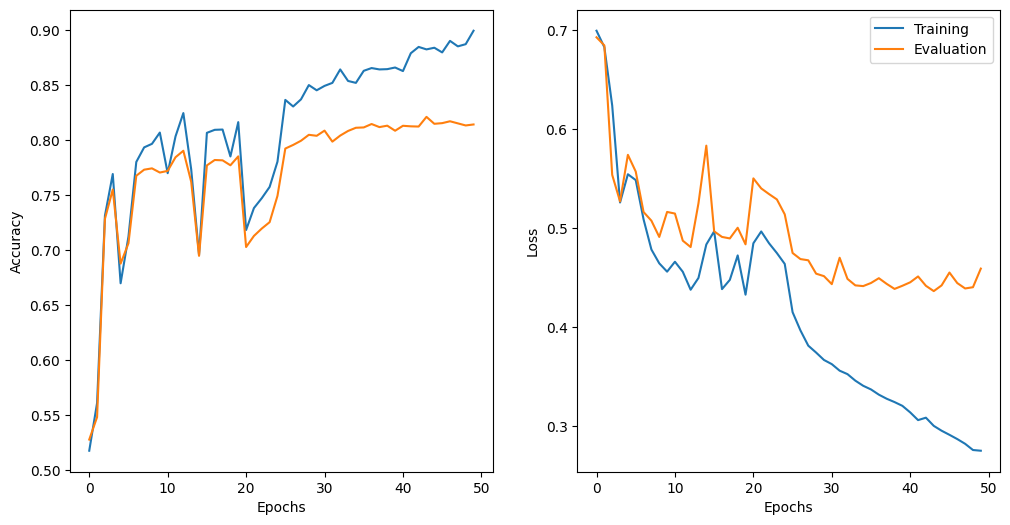

In [ ]:
plot_result(
    num_epochs,
    metrics["train_accuracy"],
    metrics["valid_accuracy"],
    metrics["train_loss"],
    metrics["valid_loss"]
)

In [ ]:
test_acc, test_loss = evaluate_epoch(model, criterion, test_dataloader, device)
test_acc, test_loss

(0.8201, 0.45171911693826505)

In [ ]:
def inference(sentence, vocabulary, model, device):
    sentence = preprocess_text(sentence)
    encoded_sentence = vocabulary(tokenizer(sentence))
    encoded_sentence = torch.tensor([encoded_sentence])
    encoded_sentence = encoded_sentence.to(device)

    with torch.no_grad():
        predictions = model(encoded_sentence, device)
    preds = nn.Softmax(dim=1)(predictions)
    p_max, yhat = torch.max(preds.data, 1)

    return round(p_max.item(), 2)*100, yhat.item()

In [ ]:
inference(sentence='quán ăn dở quá', vocabulary=vocabulary, model=model, device=device)

(88.0, 0)